# Lead Scoring Case Study


## Problem Statement
**An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.**<br><br/>
**The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.**<br><br/>
**Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.**<br><br/>
**As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.**<br><br/>
**X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.**
<br><br/>
### Goal of Case Study
**Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.**
<br><br/>


## Step 1: Importing Data

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To display all the Columns
pd.set_option('display.max_columns', 100)

In [4]:
# Importing the Leads.csv file data into lead_data dataframe
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Inspecting the Data

In [5]:
# To see the head of the dataset
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# To see the last 5 rows of the dataframe
lead_data.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [7]:
# To check the dimensions of the dataframe
lead_data.shape

(9240, 37)

**INFERENCES:**
* **Number of columns: 37**
* **Number of rows: 9240**

In [8]:
# To see the statistical aspects of the dataframe
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# To see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### INFERENCE: 
* **There are missing values in multiple columns of the Leads data.**
* **7 columns are numerical** 
* **30 columns are categorical**

## Step 3: Data Cleaning

In [10]:
# To check number of null values in each column
lead_data.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

**INFERENCE: We can see that 6 columns have more than 3000 missing values. These columns can be removed as lot of data is missing and hence they are of no use.**

### 3.1 Dropping the columns which have more than 3000 Null values

In [11]:
for cols in lead_data.columns:
    if lead_data[cols].isna().sum()>=3000:
        lead_data.drop(cols, axis=1, inplace=True)

In [12]:
# To again check number of null values in each column
lead_data.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [13]:
# To check the dimensions of the dataframe
lead_data.shape

(9240, 31)

In [14]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### 3.2 Dropping more columns which are insignificant

#### Columns such as 'City' and 'Country' can be dropped as they are of no use in further analysis.

In [15]:
lead_data.drop('City', axis=1, inplace=True)

In [16]:
lead_data.drop('Country', axis=1, inplace=True)

In [17]:
# To again check number of null values in each column
lead_data.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

In [18]:
# To check number of null values in each column (in terms of percentage)
round(100*(lead_data.isnull().sum().sort_values(ascending=False)/len(lead_data.index)),2)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
X Education Forums                                0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect I

In [19]:
# To check the dimensions of the dataframe
lead_data.shape

(9240, 29)

#### Handling 'Select' values present in many columns

In [20]:
for col in lead_data.columns:
    print(lead_data[col].astype('object').value_counts())
    print("--"*50)

62bef45c-0865-44b9-b8cc-bdb2e9055b9c    1
628e9830-4ec8-43c3-a7c6-747de071801d    1
c156705e-61e9-4f98-8233-3f4806ca177b    1
b3625b6d-4df0-47cc-af33-ec9e06ad50e9    1
cf864218-791a-4ff8-9fac-c5ab9892ba67    1
                                       ..
02903c65-5918-41a9-86cc-991e13c3ff17    1
3015dffa-9789-4b07-b8e0-eea070c367f2    1
fa1ce3ce-d985-40f6-a653-cd2986fe1a36    1
58073de8-3edf-434d-87bf-cda478b48d6c    1
236cfe5f-76c7-4f9d-82a7-9fe741303aea    1
Name: Prospect ID, Length: 9240, dtype: int64
----------------------------------------------------------------------------------------------------
655360    1
616444    1
633531    1
649919    1
632837    1
         ..
628023    1
611640    1
628025    1
644410    1
620768    1
Name: Lead Number, Length: 9240, dtype: int64
----------------------------------------------------------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import     

**INFERENCES:**
* **There are 'Select' values in many columns. The reason being that the customer has not selected any option for that field and therefore 'Select' is shown by default. 'Select' values can be considered as Null values.** <br><br/>
* **There are some columns which have count for majorly one option only in each of them. These columns are 'Do Not Call', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content' and 'I agree to pay the amount through cheque'.**

In [21]:
# Checking the value_counts on "Lead Profile"
print(lead_data['Lead Profile'].value_counts())

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64


In [22]:
# Checking the value_counts on "Specialization"
print(lead_data['Specialization'].value_counts())

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


In [23]:
# Checking the value_counts on "How did you hear about X Education"
print(lead_data['How did you hear about X Education'].value_counts())

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


**INFERENCE:**
* **We can see that 'Lead Profile' and 'How did you hear about X Education' have a lot of rows which have the value 'Select' which are of no use in further analysis. Therefore, we can drop these 2 columns.**

#### Columns such as 'Lead Profile' and 'How did you hear about X Education' can be dropped as they are of no use in further analysis.

In [24]:
lead_data.drop('Lead Profile', axis=1, inplace=True)

In [25]:
lead_data.drop('How did you hear about X Education', axis=1, inplace=True)

In [26]:
# To again check number of null values in each column
lead_data.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
X Education Forums                                  0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                                         0
Newspaper Article                                   0
Magazine                    

#### Columns which have only one option majorly selected in each of them can be dropped as they create data imbalance and are of no use in further analysis.

In [27]:
# List of such columns
major_col = ['Do Not Call', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']

In [28]:
lead_data.drop(major_col, axis=1, inplace=True)

In [29]:
# To again check number of null values in each column
lead_data.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

**INFERENCE:**
* **The column 'What is your current occupation' also has a lot of null values. Let's drop those rows having the null value in this column instead of dropping the entire column.**

#### Dropping the rows which have null value in 'What is your current occupation' column

In [30]:
lead_data=lead_data[~pd.isnull(lead_data['What is your current occupation'])]

In [31]:
# To again check number of null values in each column
lead_data.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

**INFERENCE:**
* **The number of null values present in the 5 columns is less if compared to the entire dataset.**
* **Therefore, the rows having null values in the below 5 columns can be dropped.**
    * **TotalVisits**
    * **Page Views Per Visit**
    * **Last Activity**
    * **Lead Source**
    * **Specialization**

#### Dropping the rows which have null value in 'TotalVisits' column

In [32]:
lead_data=lead_data[~pd.isnull(lead_data['TotalVisits'])]

#### Dropping the rows which have null value in 'Page Views Per Visit' column

In [33]:
lead_data=lead_data[~pd.isnull(lead_data['Page Views Per Visit'])]

#### Dropping the rows which have null value in 'Last Activity' column

In [34]:
lead_data=lead_data[~pd.isnull(lead_data['Last Activity'])]

#### Dropping the rows which have null value in 'Lead Source' column

In [35]:
lead_data=lead_data[~pd.isnull(lead_data['Lead Source'])]

#### Dropping the rows which have null value in 'Specialization' column

In [36]:
lead_data=lead_data[~pd.isnull(lead_data['Specialization'])]

In [37]:
# Checking the value_counts on "Specialization"
print(lead_data['Specialization'].value_counts())

Select                               1838
Finance Management                    745
Human Resource Management             665
Marketing Management                  663
Operations Management                 391
Business Administration               310
IT Projects Management                278
Supply Chain Management               275
Banking, Investment And Insurance     266
Media and Advertising                 161
Travel and Tourism                    149
International Business                136
Healthcare Management                 122
Hospitality Management                 90
E-COMMERCE                             80
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
Name: Specialization, dtype: int64


**INFERENCES:**
* **Now, there are 1838 leads who have not selected any Specialization. Maybe they have not done any specialization or their specialization is not given in the list.**
* **Let's keep these leads and convert 'Select' to 'Not Applicable'.**

In [38]:
# To convert 'Select' values to 'Not Applicable'
lead_data['Specialization'] = lead_data['Specialization'].replace('Select', 'Not Applicable')

In [39]:
# To again check number of null values in each column
lead_data.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [40]:
# Checking the value_counts on "Specialization"
print(lead_data['Specialization'].value_counts())

Not Applicable                       1838
Finance Management                    745
Human Resource Management             665
Marketing Management                  663
Operations Management                 391
Business Administration               310
IT Projects Management                278
Supply Chain Management               275
Banking, Investment And Insurance     266
Media and Advertising                 161
Travel and Tourism                    149
International Business                136
Healthcare Management                 122
Hospitality Management                 90
E-COMMERCE                             80
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
Name: Specialization, dtype: int64


**INFERENCE:**
* **None of the columns have null values now.**
* **Columns 'Prospect ID' and 'Lead Number' are insignificant in this analysis as all values are unique. Therefore, these can be dropped.**

#### Columns such as 'Prospect ID' and 'Lead Number' can be dropped as they are of no use in further analysis.

In [41]:
lead_data.drop('Prospect ID', axis=1, inplace=True)

In [42]:
lead_data.drop('Lead Number', axis=1, inplace=True)

In [43]:
lead_data.shape

(6373, 12)

In [44]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

In [45]:
lead_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
# Number of unique values in each column.
lead_data.nunique().sort_values()

Do Not Email                                 2
Converted                                    2
A free copy of Mastering The Interview       2
Lead Origin                                  4
What is your current occupation              6
Last Notable Activity                       14
Lead Source                                 16
Last Activity                               16
Specialization                              19
TotalVisits                                 38
Page Views Per Visit                       107
Total Time Spent on Website               1613
dtype: int64

In [47]:
# To find percentage of rows that we have retained.
print(len(lead_data.index))
print(len(lead_data.index)/9240)

6373
0.6897186147186147


**INFERENCE: 69% of rows are retained**
<br><br/>

## Step 4: Exploratory Data Analysis
**'Converted' is the target variable. Let's visualize the data to understand it further.**

### Visualising Numerical Variables

In [48]:
# Creating a new dataframe 'lead_data_num'. Keeping only numerical variables in it.
lead_data_num = lead_data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

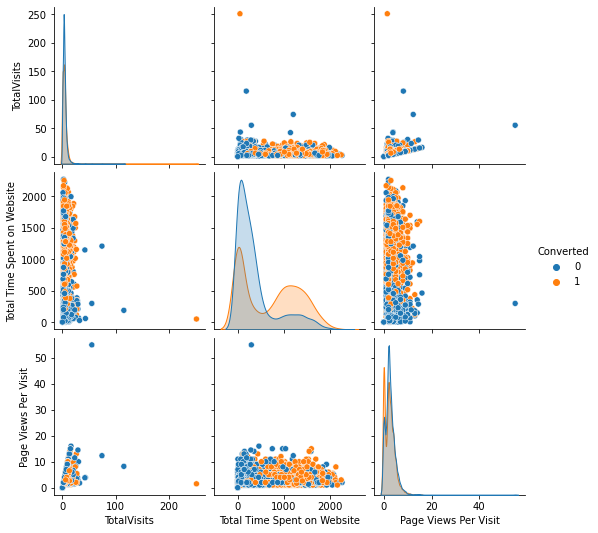

In [49]:
# Plotting pairplot
sns.pairplot(lead_data, hue='Converted', diag_kind='kde')
plt.show()

**INFERENCE:**
* **Leads who have spent more time on the website have converted.**
* **There are outliers in the data.**

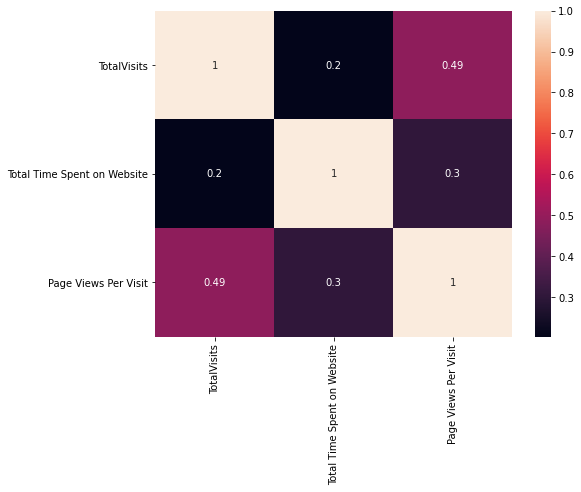

In [50]:
# Correlation Matrix for Numerical variables
plt.figure(figsize=(8,6))
sns.heatmap(lead_data_num.corr(), annot = True)
plt.show()

### Visualising Categorical Variables

In [51]:
# Creating a new dataframe 'lead_data_cat'. Keeping categorical variables and 'Converted' variable in it.
lead_data_cat = lead_data[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity', 'Converted']]

In [52]:
lead_data_cat.head()

,Lead Origin,Lead Source,Do Not Email,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,API,Olark Chat,No,Page Visited on Website,Not Applicable,Unemployed,No,Modified,0
1,API,Organic Search,No,Email Opened,Not Applicable,Unemployed,No,Email Opened,0
2,Landing Page Submission,Direct Traffic,No,Email Opened,Business Administration,Student,Yes,Email Opened,1
3,Landing Page Submission,Direct Traffic,No,Unreachable,Media and Advertising,Unemployed,No,Modified,0
4,Landing Page Submission,Google,No,Converted to Lead,Not Applicable,Unemployed,No,Modified,1


In [53]:
# Created a function 'cat_plotting' to plot a countplot for each of the categorical columns.

def cat_plotting(data, column):
    
    data = data
    col = column
    
    plt.figure(figsize=(12,6))
    
    sns.countplot(x=col, hue='Converted', data=data)
    plt.xticks(rotation=90)
    
    plt.show()

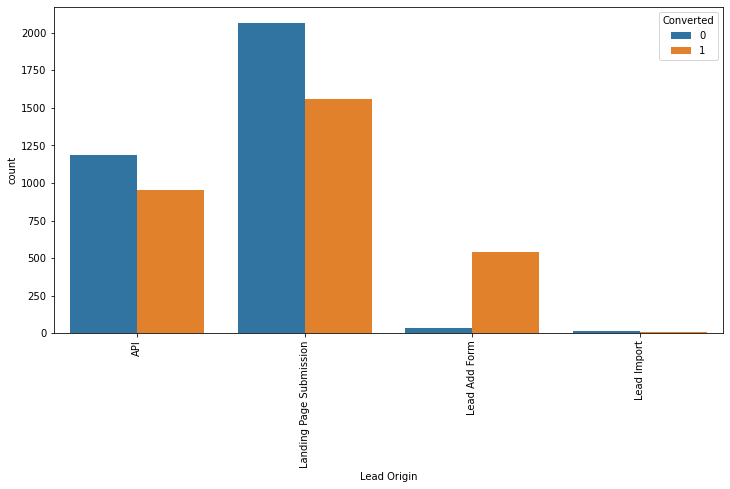

In [54]:
# Plotting for 'Lead Origin'
cat_plotting(lead_data_cat,'Lead Origin')

**INFERENCES:**
* **Though the count of leads is less having Lead Origin as 'Lead Add Form', the conversion rate for Lead Add Form is very high.**
* **'Leads Import' has the least number of leads.**
* **Leads with Lead Origin as 'API' or 'Landing Page Submission' are significant.**

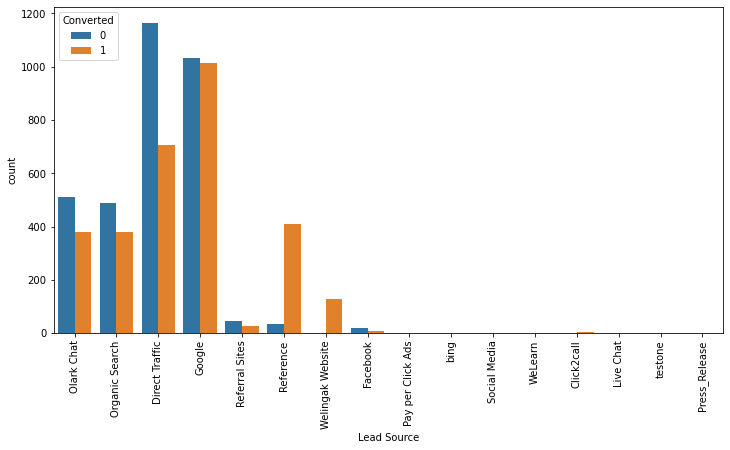

In [55]:
# Plotting for 'Lead Source'
cat_plotting(lead_data_cat,'Lead Source')

**INFERENCES:**
* **Maximum number of leads are through Google and Direct Traffic sources.**
* **Conversion rate is high when leads are through Reference and Welingak Website.**

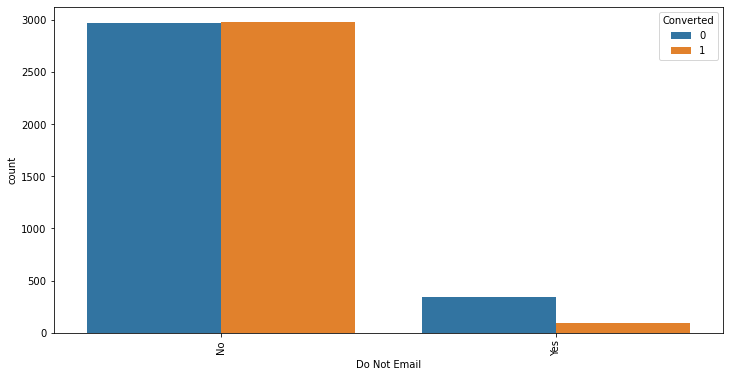

In [56]:
# Plotting for 'Do Not Email'
cat_plotting(lead_data_cat,'Do Not Email')

**INFERENCE: Nothing significant can be concluded with 'Do Not Email' variable.**

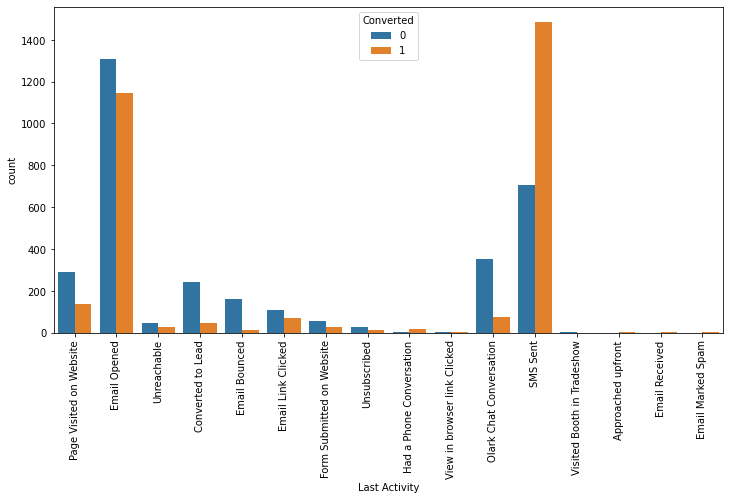

In [57]:
# Plotting for 'Last Activity'
cat_plotting(lead_data_cat,'Last Activity')

**INFERENCES:**
* **Most of the leads have 'Email Opened' as their last activity.**
* **Conversion rate is highest for leads having last activity as 'SMS Sent'.**

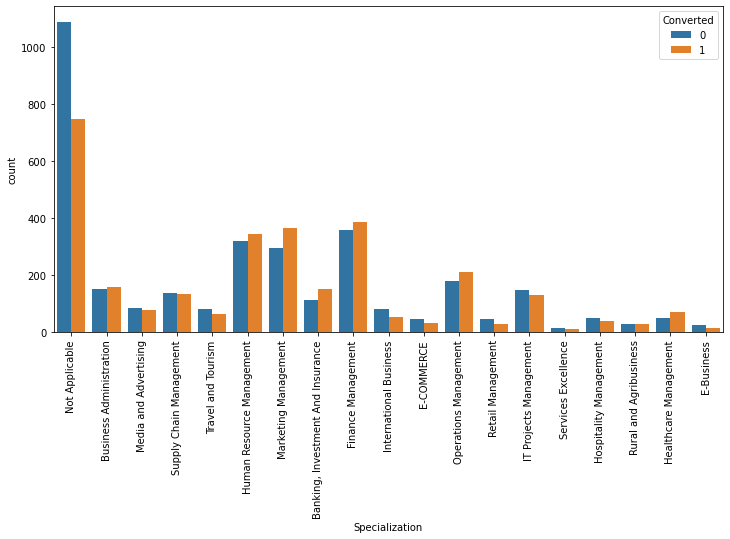

In [58]:
# Plotting for 'Specialization'
cat_plotting(lead_data_cat,'Specialization')

**INFERENCE: Except the leads who have not given specialization, most of the conversions are from leads having Management related specialization.**

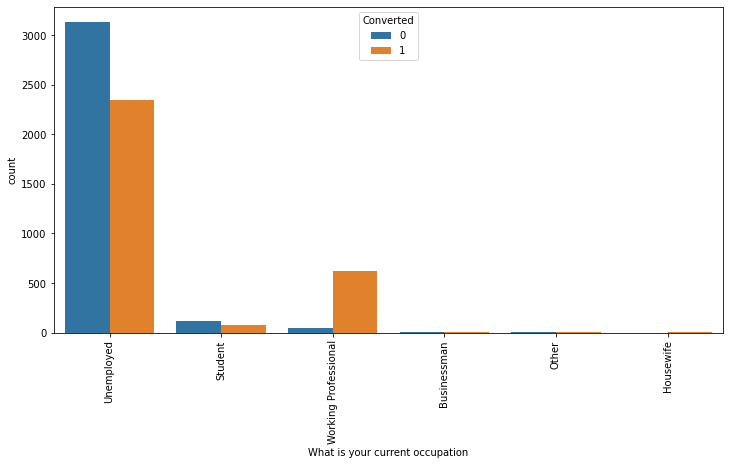

In [59]:
# Plotting for 'What is your current occupation'
cat_plotting(lead_data_cat,'What is your current occupation')

**INFERENCES:**
* **Working Professionals have high chances of getting converted.**
* **Unemployed leads have the highest conversion rate compared to leads with other occupation.**

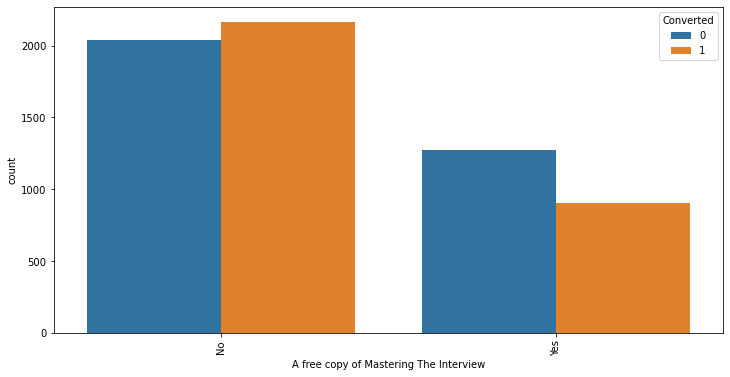

In [60]:
# Plotting for 'A free copy of Mastering The Interview'
cat_plotting(lead_data_cat,'A free copy of Mastering The Interview')

**INFERENCE: Nothing significant can be concluded with 'A free copy of Mastering The Interview' variable.**

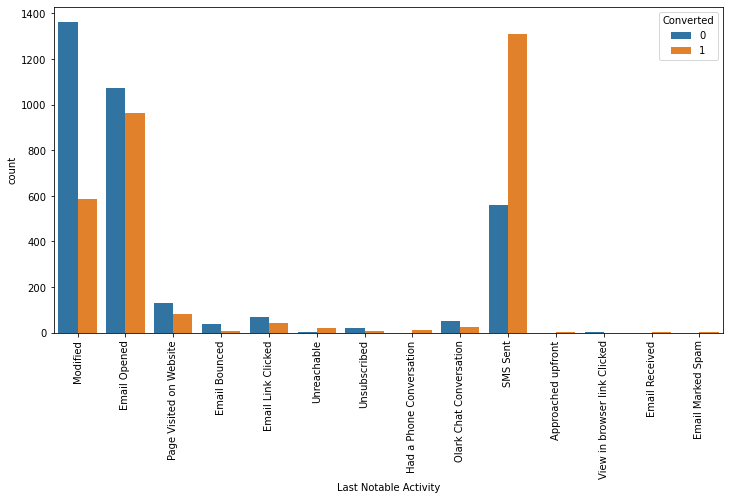

In [61]:
# Plotting for 'Last Notable Activity'
cat_plotting(lead_data_cat,'Last Notable Activity')

## Step 5: Data Preparation

In [62]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Applicable,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Applicable,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Applicable,Unemployed,No,Modified


### Converting some binary variables (Yes/No) to 0/1

In [63]:
# List of variables to map

var_list = ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[var_list] = lead_data[var_list].apply(binary_map)

In [64]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Applicable,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Applicable,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Applicable,Unemployed,0,Modified


### Create Dummy Variables for categorical variables

In [65]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization',
                              'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
lead_data = pd.concat([lead_data, dummy], axis=1)

In [66]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Do Not Email,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Applicable,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Applicable,Unemployed,0,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Applicable,Unemployed,0,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Applicable,Unemployed,0,Modified,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [67]:
# Drop the variables for which the dummy variables have been created

lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization',
                            'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [68]:
# Drop 'Specialization_Not Applicable' as it is useless
lead_data = lead_data.drop(['Specialization_Not Applicable'], 1)

In [69]:
lead_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [70]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 72 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6373 non-null   int64  
 1   TotalVisits                                           6373 non-null   float64
 2   Total Time Spent on Website                           6373 non-null   int64  
 3   Page Views Per Visit                                  6373 non-null   float64
 4   Lead Origin_Landing Page Submission                   6373 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6373 non-null   uint8  
 6   Lead Origin_Lead Import                               6373 non-null   uint8  
 7   Lead Source_Direct Traffic                            6373 non-null   uint8  
 8   Lead Source_Facebook                                  6373

## Step 6: Test-Train Split
**Split the dataset into training and testing sets.**

In [71]:
# Import the required library
from sklearn.model_selection import train_test_split

In [72]:
# Put feature variables into X
X = lead_data.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [73]:
# Put target variable in y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [74]:
# Splitting the data into train and test (i.e. 70% train and 30% test with random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 7: Feature Scaling

In [75]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()

# Scale the below three numeric features present in the dataset
# TotalVisits, Total time spent on websites, Page Views per visit

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [77]:
### Checking the Conversion Rate
converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
converted

48.093519535540565

**We have approx. 48% conversion rate.**<br><br/>

## Step 8: Looking at Correlations

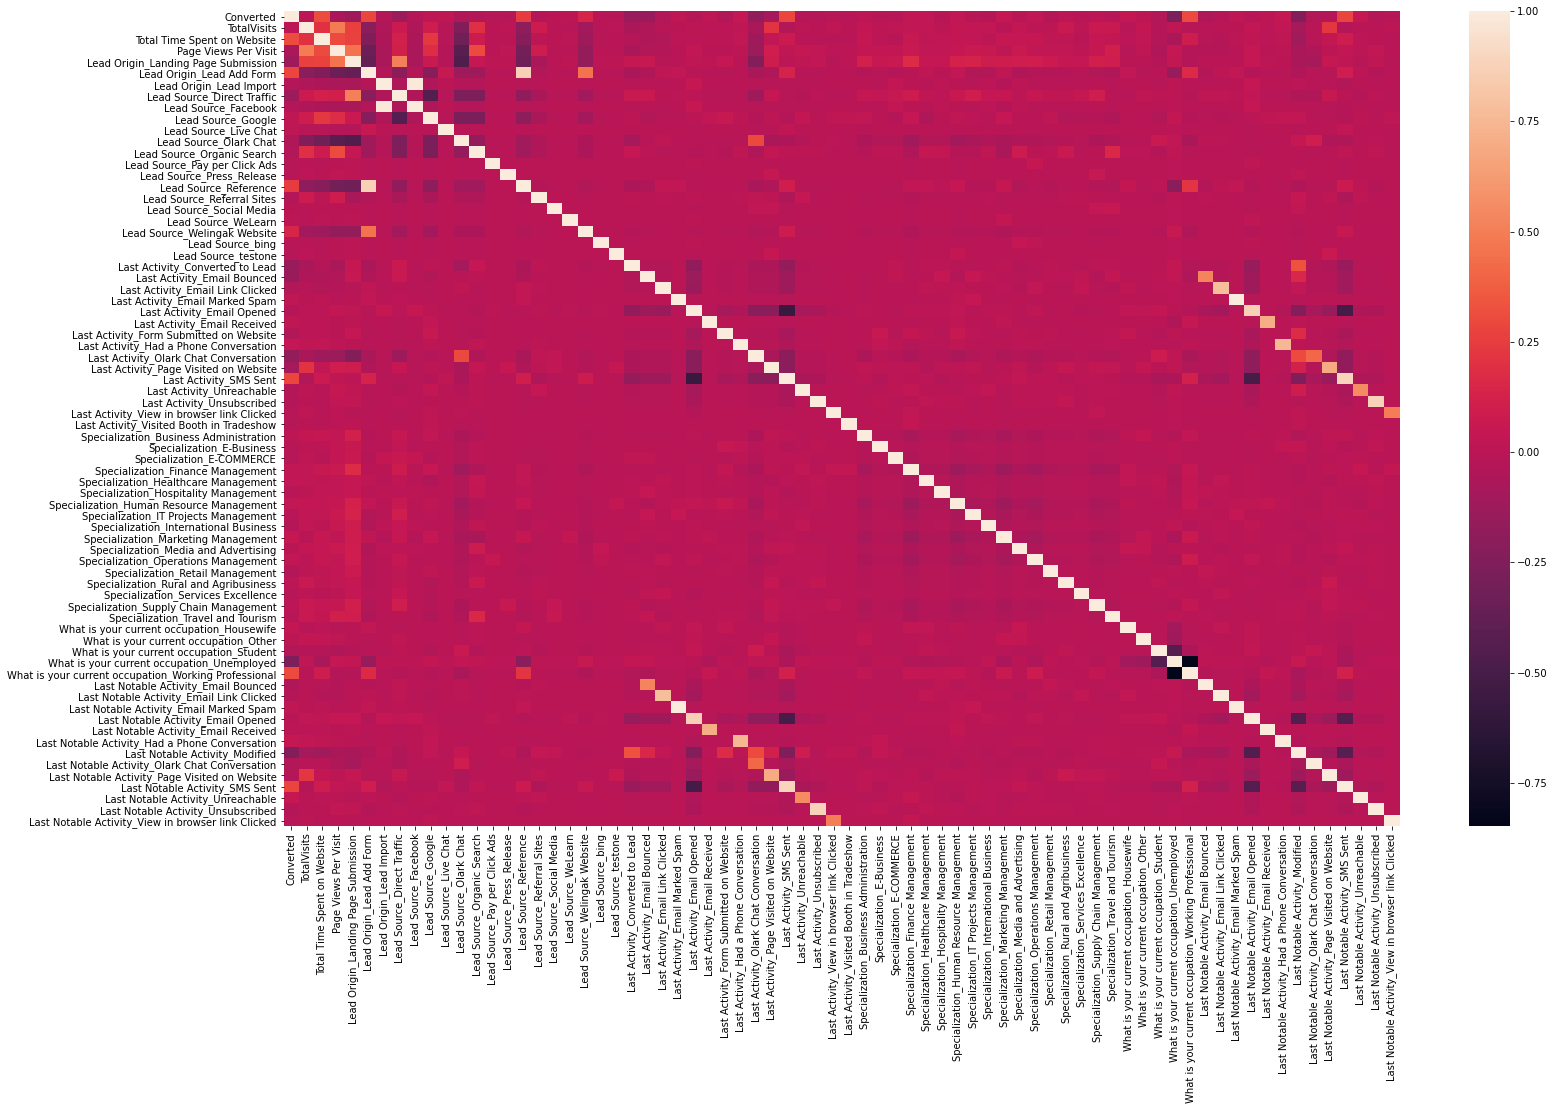

In [78]:
# Let's see the Correlation Matrix
plt.figure(figsize = (25,15))
sns.heatmap(lead_data.corr())
plt.show()

## Step 9: Model Building

In [79]:
import statsmodels.api as sm

In [80]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4395
Model Family:                Binomial   Df Model:                           65
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 07 Dec 2021   Deviance:                   1.1301e+05
Time:                        03:15:38   Pearson chi2:                 5.53e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -3.516e+15   8.84e+07  -3.98e+07      0.000   -3.52e+15   -3.52e+15
TotalVisits                                           5.366e+15   5.39e+07   9.96e+07      0.000    5.37e+15    5.37e+15
Total Time Spent on Website                            1.27e+15   4.65e+06   2.73e+08      0.000    1.27e+15    1.27e+15
Page Views Per Visit                                  1.567e+14   1.15e+07   1.36e+07      0.000    1.57e+14    1.57e+14
Lead Origin_Landing Page Submission                  -3.432e+14   3.54e+06  -9.71e+07      0.000   -3.43e+14   -3.43e+14
Lead Origin_Lead Add Form                             5.167e+15   4.77e+07   1.08e+08      0.000    5.17e+15    5.17e+15
Lead Origin_Lead Import                               3.683e+15   4.21e+07   8.75e+07      0.000    3.68e+15    3.68e+15
Lead Source_Direct Traffic                            8.695e+15   8.25e+07   1.05e+08      0.000    8.69e+15    8.69e+15
Lead Source_Facebook                                  3.683e+15   4.21e+07   8.75e+07      0.000    3.68e+15    3.68e+15
Lead Source_Google                                     8.68e+15   8.25e+07   1.05e+08      0.000    8.68e+15    8.68e+15
Lead Source_Live Chat                                 7.839e+15   8.24e+07   9.51e+07      0.000    7.84e+15    7.84e+15
Lead Source_Olark Chat                                8.869e+15   8.25e+07   1.08e+08      0.000    8.87e+15    8.87e+15
Lead Source_Organic Search                             8.69e+15   8.26e+07   1.05e+08      0.000    8.69e+15    8.69e+15
Lead Source_Pay per Click Ads                         5.177e+15   1.06e+08   4.86e+07      0.000    5.18e+15    5.18e+15
Lead Source_Press_Release                              5.27e+15   1.07e+08   4.93e+07      0.000    5.27e+15    5.27e+15
Lead Source_Reference                                 4.503e+15   6.74e+07   6.68e+07      0.000     4.5e+15     4.5e+15
Lead Source_Referral Sites                            8.315e+15   8.31e+07      1e+08      0.000    8.32e+15    8.32e+15
Lead Source_Social Media                              -193.2533    2.3e-06   -8.4e+07      0.000    -193.253    -193.253
Lead Source_WeLearn                                   1.373e+16   1.06e+08   1.29e+08      0.000    1.37e+16    1.37e+16
Lead Source_Welingak Website                          5.245e+15   6.77e+07   7.75e+07      0.000    5.25e+15    5.25e+15
Lead Source_bing                                      5.206e+15   9.52e+07   5.47e+07      0.000    5.21e+15    5.21e+15
Lead Source_testone                                   4.709e+15   1.06e+08   4.42e+07      0.000    4.71e+15    4.71e+15
Last Activity_Converted to Lead                      -4.85

### Feature Selection Using RFE

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [82]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [83]:
# To see which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 8),
 ('Lead Source_Facebook', False, 53),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Pay per Click Ads', False, 33),
 ('Lead Source_Press_Release', False, 43),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Social Media', False, 57),
 ('Lead Source_WeLearn', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 14),
 ('Lead Source_testone', False, 32),
 ('Last Activity_Converted to Lead', False, 13),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 51),
 ('Last Activ

In [84]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [85]:
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [86]:
# Select only the columns selected by RFE
X_train = X_train[col]

### Model 1 - All variables selected by RFE

In [87]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [88]:
X_train_rfe.shape

(4461, 15)

#### Checking VIFs

In [89]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.18
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.37
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.61
12,What is your current occupation_Working Profes...,1.57


#### Building model using statsmodel, for the detailed statistics

In [91]:
X_train_m1 = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train,X_train_m1, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2094.4
Date:                Tue, 07 Dec 2021   Deviance:                       4188.8
Time:                        03:15:48   Pearson chi2:                 4.92e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0318      0.610     -1.692      0.091      -2.227       0.163
TotalVisits                                              9.6750      2.784      3.476      0.001       4.219      15.131
Total Time Spent on Website                              4.4599      0.184     24.201      0.000       4.099       4.821
Lead Origin_Lead Add Form                                2.9836      1.187      2.513      0.012       0.657       5.311
Lead Source_Olark Chat                                   1.4640      0.122     11.997      0.000       1.225       1.703
Lead Source_Reference                                    1.2246      1.210      1.012      0.312      -1.147       3.596
Lead Source_Welingak Website                             3.2963      1.555      2.120      0.034       0.249       6.343
Last Activity_Email Bounced                             -1.6916      0.366     -4.625      0.000      -2.409      -0.975
Last Activity_Had a Phone Conversation                   1.0754      0.984      1.093      0.274      -0.853       3.004
Last Activity_SMS Sent                                   1.1088      0.082     13.585      0.000       0.949       1.269
What is your current occupation_Housewife               22.6894   2.45e+04      0.001      0.999   -4.79e+04     4.8e+04
What is your current occupation_Student                 -1.1259      0.639     -1.762      0.078      -2.379       0.127
What is your current occupation_Unemployed              -1.3232      0.604     -2.190      0.029      -2.507      -0.139
What is your current occupation_Working Professional     1.2999      0.633      2.055      0.040       0.060       2.540
Last Notable Activity_Had a Phone Conversation          23.2092   2.07e+04      0.001      0.999   -4.06e+04    4.06e+04
Last Notable Activity_Unreachable                        2.8181      0.807      3.491      0.000       1.236       4.400
========================================================================================================================
"""

**The variables `What is your current occupation_Housewife` and `Last Notable Activity_Had a Phone Conversation` have a high p-value. Let's first drop the variable `What is your current occupation_Housewife`.**

### Model 2

In [92]:
X_train_m2 = X_train_rfe.drop('What is your current occupation_Housewife', axis = 1)

In [93]:
X_train_m2.shape

(4461, 14)

#### Checking VIFs

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_m2.columns
vif['VIF'] = [variance_inflation_factor(X_train_m2.values, i) for i in range(X_train_m2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.18
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
10,What is your current occupation_Unemployed,3.64
7,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.36
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.61
11,What is your current occupation_Working Profes...,1.56


In [95]:
# Adding a constant variable  
X_train_lm2 = sm.add_constant(X_train_m2)

In [96]:
# Refit the model with the new set of features
logm2 = sm.GLM(y_train,X_train_lm2, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2096.7
Date:                Tue, 07 Dec 2021   Deviance:                       4193.4
Time:                        03:15:49   Pearson chi2:                 4.93e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4554      0.559     -0.815      0.415      -1.550       0.640
TotalVisits                                              9.4512      2.769      3.413      0.001       4.024      14.879
Total Time Spent on Website                              4.4587      0.184     24.203      0.000       4.098       4.820
Lead Origin_Lead Add Form                                2.9789      1.187      2.509      0.012       0.652       5.306
Lead Source_Olark Chat                                   1.4587      0.122     11.967      0.000       1.220       1.698
Lead Source_Reference                                    1.2263      1.210      1.013      0.311      -1.145       3.598
Lead Source_Welingak Website                             3.2963      1.555      2.120      0.034       0.250       6.343
Last Activity_Email Bounced                             -1.6927      0.366     -4.628      0.000      -2.410      -0.976
Last Activity_Had a Phone Conversation                   1.0758      0.984      1.094      0.274      -0.852       3.004
Last Activity_SMS Sent                                   1.1085      0.082     13.582      0.000       0.948       1.268
What is your current occupation_Student                 -1.6976      0.592     -2.865      0.004      -2.859      -0.536
What is your current occupation_Unemployed              -1.8947      0.555     -3.416      0.001      -2.982      -0.808
What is your current occupation_Working Professional     0.7282      0.585      1.244      0.213      -0.419       1.875
Last Notable Activity_Had a Phone Conversation          22.2114   1.26e+04      0.002      0.999   -2.46e+04    2.47e+04
Last Notable Activity_Unreachable                        2.8154      0.808      3.486      0.000       1.233       4.398
========================================================================================================================
"""

**Let's drop the variable `Last Notable Activity_Had a Phone Conversation` as it has a high p-value.**

### Model 3

In [97]:
X_train_m3 = X_train_m2.drop('Last Notable Activity_Had a Phone Conversation', axis = 1)

In [98]:
X_train_m3.shape

(4461, 13)

#### Checking VIFs

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_m3.columns
vif['VIF'] = [variance_inflation_factor(X_train_m3.values, i) for i in range(X_train_m3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.18
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
10,What is your current occupation_Unemployed,3.64
1,Total Time Spent on Website,2.36
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.61
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
9,What is your current occupation_Student,1.09


In [100]:
# Adding a constant variable  
X_train_lm3 = sm.add_constant(X_train_m3)

In [101]:
# Refit the model with the new set of features
logm3 = sm.GLM(y_train,X_train_lm3, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2099.6
Date:                Tue, 07 Dec 2021   Deviance:                       4199.2
Time:                        03:15:49   Pearson chi2:                 4.94e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4569      0.559     -0.818      0.413      -1.552       0.638
TotalVisits                                              9.5774      2.773      3.454      0.001       4.143      15.012
Total Time Spent on Website                              4.4513      0.184     24.179      0.000       4.090       4.812
Lead Origin_Lead Add Form                                2.9789      1.187      2.509      0.012       0.652       5.306
Lead Source_Olark Chat                                   1.4587      0.122     11.967      0.000       1.220       1.698
Lead Source_Reference                                    1.2264      1.210      1.014      0.311      -1.145       3.598
Lead Source_Welingak Website                             3.2963      1.554      2.120      0.034       0.250       6.343
Last Activity_Email Bounced                             -1.6916      0.366     -4.626      0.000      -2.408      -0.975
Last Activity_Had a Phone Conversation                   2.8034      0.802      3.497      0.000       1.232       4.375
Last Activity_SMS Sent                                   1.1084      0.082     13.584      0.000       0.948       1.268
What is your current occupation_Student                 -1.6960      0.592     -2.863      0.004      -2.857      -0.535
What is your current occupation_Unemployed              -1.8932      0.554     -3.415      0.001      -2.980      -0.806
What is your current occupation_Working Professional     0.7275      0.585      1.243      0.214      -0.419       1.874
Last Notable Activity_Unreachable                        2.8145      0.807      3.485      0.000       1.232       4.397
========================================================================================================================
"""

**Let's drop the variable `Lead Source_Reference` as the p-value is greater than 0.05.**

### Model 4

In [102]:
X_train_m4 = X_train_m3.drop('Lead Source_Reference', axis = 1)

In [103]:
X_train_m4.shape

(4461, 12)

#### Checking VIFs

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_m4.columns
vif['VIF'] = [variance_inflation_factor(X_train_m4.values, i) for i in range(X_train_m4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.64
1,Total Time Spent on Website,2.36
2,Lead Origin_Lead Add Form,1.70
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.61
10,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.43
4,Lead Source_Welingak Website,1.33
8,What is your current occupation_Student,1.09
5,Last Activity_Email Bounced,1.05


In [105]:
# Adding a constant variable  
X_train_lm4 = sm.add_constant(X_train_m4)

In [106]:
# Refit the model with the new set of features
logm4 = sm.GLM(y_train,X_train_lm4, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2100.0
Date:                Tue, 07 Dec 2021   Deviance:                       4200.0
Time:                        03:15:50   Pearson chi2:                 4.92e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4561      0.558     -0.817      0.414      -1.551       0.638
TotalVisits                                              9.5775      2.773      3.454      0.001       4.143      15.012
Total Time Spent on Website                              4.4513      0.184     24.179      0.000       4.090       4.812
Lead Origin_Lead Add Form                                4.1675      0.258     16.136      0.000       3.661       4.674
Lead Source_Olark Chat                                   1.4586      0.122     11.966      0.000       1.220       1.698
Lead Source_Welingak Website                             2.1078      1.036      2.034      0.042       0.077       4.139
Last Activity_Email Bounced                             -1.6917      0.366     -4.626      0.000      -2.408      -0.975
Last Activity_Had a Phone Conversation                   2.8034      0.802      3.497      0.000       1.232       4.375
Last Activity_SMS Sent                                   1.1082      0.082     13.583      0.000       0.948       1.268
What is your current occupation_Student                 -1.6956      0.592     -2.863      0.004      -2.856      -0.535
What is your current occupation_Unemployed              -1.8940      0.554     -3.417      0.001      -2.980      -0.808
What is your current occupation_Working Professional     0.7277      0.585      1.244      0.214      -0.419       1.874
Last Notable Activity_Unreachable                        2.8147      0.807      3.486      0.000       1.232       4.397
========================================================================================================================
"""

**Let's drop the variable `What is your current occupation_Working Professional` as it has p-value greater than 0.05**

## Model 5

In [107]:
X_train_m5 = X_train_m4.drop('What is your current occupation_Working Professional', axis = 1)

In [108]:
X_train_m5.shape

(4461, 11)

#### Checking VIFs

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_m5.columns
vif['VIF'] = [variance_inflation_factor(X_train_m5.values, i) for i in range(X_train_m5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.81
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.52
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
8,What is your current occupation_Student,1.07
5,Last Activity_Email Bounced,1.04
6,Last Activity_Had a Phone Conversation,1.01


In [110]:
# Adding a constant variable  
X_train_lm5 = sm.add_constant(X_train_m5)

In [111]:
# Refit the model with the new set of features
logm5 = sm.GLM(y_train,X_train_lm5, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2100.7
Date:                Tue, 07 Dec 2021   Deviance:                       4201.5
Time:                        03:15:51   Pearson chi2:                 4.90e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2044      0.196      1.042      0.297      -0.180       0.589
TotalVisits                                    9.4577      2.766      3.419      0.001       4.037      14.879
Total Time Spent on Website                    4.4526      0.184     24.184      0.000       4.092       4.813
Lead Origin_Lead Add Form                      4.1672      0.258     16.137      0.000       3.661       4.673
Lead Source_Olark Chat                         1.4582      0.122     11.969      0.000       1.219       1.697
Lead Source_Welingak Website                   2.1066      1.036      2.033      0.042       0.076       4.138
Last Activity_Email Bounced                   -1.6834      0.365     -4.616      0.000      -2.398      -0.969
Last Activity_Had a Phone Conversation         2.8075      0.802      3.502      0.000       1.236       4.379
Last Activity_SMS Sent                         1.1117      0.081     13.644      0.000       0.952       1.271
What is your current occupation_Student       -2.3554      0.280     -8.420      0.000      -2.904      -1.807
What is your current occupation_Unemployed    -2.5542      0.186    -13.761      0.000      -2.918      -2.190
Last Notable Activity_Unreachable              2.8162      0.807      3.488      0.000       1.234       4.399
==============================================================================================================
"""

#### Since the VIF and p-values are in the acceptable range, we will finalize this model (i.e. Model 5).

In [112]:
final_cols = X_train_m5.columns
final_cols

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Unreachable'],
      dtype='object')

## Step 10: Model Evaluation

In [113]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train_m5))
y_train_pred[:10]

8003    0.277667
218     0.137924
4171    0.122293
4037    0.290762
3660    0.949265
207     0.188492
2044    0.175462
6411    0.948679
6498    0.064093
2085    0.980619
dtype: float64

In [114]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.27766695, 0.1379242 , 0.12229282, 0.29076236, 0.94926508,
       0.18849228, 0.17546212, 0.94867887, 0.06409252, 0.98061944])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [115]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.277667
1,0,0.137924
2,1,0.122293
3,1,0.290762
4,1,0.949265


#### Creating new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0

In [116]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [117]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.277667,0
1,0,0.137924,0
2,1,0.122293,0
3,1,0.290762,0
4,1,0.949265,1


In [118]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

In [119]:
# Create Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1927  385]
 [ 561 1588]]


In [120]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.787939923783905

In [121]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
# Calculate the sensitivity

TP/(TP+FN)

0.7389483480688692

In [123]:
# Calculate the specificity

TN/(TN+FP)

0.8334775086505191

In [124]:
# Calculate false postive rate - predicting conversion when lead does not convert
print(FP/ float(TN+FP))

0.16652249134948097


In [125]:
# positive predictive value 
print(TP / float(TP+FP))

0.8048656867714141


In [126]:
# Negative predictive value
print(TN / float(TN+ FN))

0.7745176848874598


## Step 11: Plotting the ROC Curve
**0.5 was just to loosely check the model performace. But to get good results, we need to optimise the threshold. So, first let's plot an ROC curve to see what AUC we get.**

In [127]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [128]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [129]:
# Import matplotlib to plot the ROC curve
import matplotlib.pyplot as plt

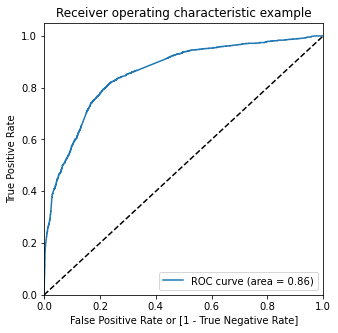

In [130]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

**INFERENCE: The area under the curve of the ROC is 0.86 which is quite good. We seem to have a good model. Now, let's check the sensitivity and specificity tradeoff to find the optimal cutoff point.**

## Step 12: Finding Optimal Cutoff Point

In [131]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.277667,0,1,1,1,0,0,0,0,0,0,0
1,0,0.137924,0,1,1,0,0,0,0,0,0,0,0
2,1,0.122293,0,1,1,0,0,0,0,0,0,0,0
3,1,0.290762,0,1,1,1,0,0,0,0,0,0,0
4,1,0.949265,1,1,1,1,1,1,1,1,1,1,1


In [132]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.513114  0.992089  0.067907
0.2   0.2  0.692221  0.947417  0.455017
0.3   0.3  0.766196  0.863658  0.675606
0.4   0.4  0.789733  0.803630  0.776817
0.5   0.5  0.787940  0.738948  0.833478
0.6   0.6  0.755660  0.622615  0.879325
0.7   0.7  0.732795  0.538855  0.913062
0.8   0.8  0.709482  0.447650  0.952855
0.9   0.9  0.642009  0.276408  0.981834


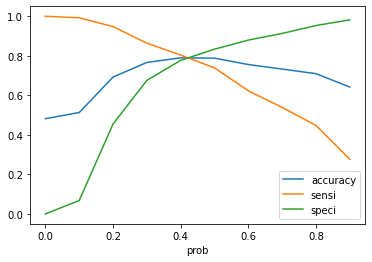

In [133]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.42 seems to be the optimum point from the three metrics. So, let's take 0.42 as a cutoff probability.

In [134]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.277667,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.137924,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.122293,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.290762,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.949265,1,1,1,1,1,1,1,1,1,1,1,1


In [135]:
# Let's check the accuracy now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7901815736381977

In [136]:
# Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[1830,  482],
       [ 454, 1695]], dtype=int64)

In [137]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [138]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7887389483480689

In [139]:
# Let us calculate specificity
TN / float(TN+FP)

0.7915224913494809

In [140]:
# Calculate false postive rate - predicting conversion when lead does not convert
print(FP/float(TN+FP))

0.20847750865051903


In [141]:
# Positive predictive value 
print(TP/float(TP+FP))

0.77859439595774


In [142]:
# Negative predictive value
print(TN/float(TN+FN))

0.8012259194395797


## Step 13: Precision and Recall

In [143]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[1927,  385],
       [ 561, 1588]], dtype=int64)

##### Precision
TP / FP + TP

In [144]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8048656867714141

##### Recall
TP / FN + TP

In [145]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7389483480688692

### Precision and recall tradeoff

In [146]:
from sklearn.metrics import precision_recall_curve

In [147]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [148]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

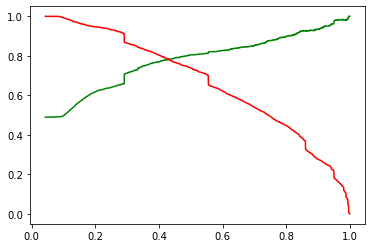

In [149]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [150]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.277667,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.137924,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.122293,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.290762,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.949265,1,1,1,1,1,1,1,1,1,1,1,1


In [151]:
# Let's check the accuracy now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7901815736381977

In [152]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1840,  472],
       [ 464, 1685]], dtype=int64)

In [153]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [154]:
# Calculate Precision

TP/(TP+FP)

0.7811775614279092

In [155]:
# Calculate Recall

TP/(TP+FN)

0.7840856212191717

## Step 14: Making Predictions on the Test Set

**Let's now make predicitons on the test set.**

In [156]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [157]:
X_test = X_test[final_cols]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,0,0,0,1,0,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,1,0
9202,0.015936,0.416813,0,0,0,0,0,1,0,1,0
6570,0.011952,0.378961,0,0,0,0,0,1,0,1,0
2668,0.031873,0.395246,0,0,0,0,0,1,0,1,0


In [158]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))

In [159]:
y_test_pred[:10]

4771    0.995862
6122    0.123821
9202    0.683205
6570    0.636989
2668    0.694922
4233    0.941270
3368    0.703722
9091    0.450195
5972    0.263949
3631    0.768897
dtype: float64

In [160]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [161]:
# Let's see the head
y_pred_1.head()

,0
4771,0.995862
6122,0.123821
9202,0.683205
6570,0.636989
2668,0.694922


In [162]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [163]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [164]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [165]:
# Check 'y_pred_final'
y_pred_final.head()

,Converted,0
0,1,0.995862
1,0,0.123821
2,0,0.683205
3,1,0.636989
4,1,0.694922


In [166]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [167]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.995862
1,0,0.123821
2,0,0.683205
3,1,0.636989
4,1,0.694922


In [168]:
# Make predictions on the test set using 0.43 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)

In [169]:
# Check y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.995862,1
1,0,0.123821,0
2,0,0.683205,1
3,1,0.636989,1
4,1,0.694922,1


In [170]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7902719665271967

In [171]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[798, 198],
       [203, 713]], dtype=int64)

In [172]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [173]:
# Calculate Precision
TP/(TP+FP)

0.7826564215148188

In [174]:
# Calculate Recall
TP/(TP+FN)

0.7783842794759825

In [175]:
# Let's see the sensitivity of the logistic regression model
TP/float(TP+FN)

0.7783842794759825

In [176]:
# Let us calculate specificity
TN/float(TN+FP)

0.8012048192771084

In [177]:
### Assigning Lead Score to the Test Data
y_pred_final['Lead Score'] = y_pred_final.Conversion_Prob.map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted,Lead Score
0,1,0.995862,1,100
1,0,0.123821,0,12
2,0,0.683205,1,68
3,1,0.636989,1,64
4,1,0.694922,1,69


## Conclusion

* **The top 3 variables which contribute most towards the probability of a lead getting converted are:**
    * **TotalVisits**
    * **Total Time Spent on Website**
    * **Lead Origin_Lead Add Form**<br/>
* **Probability of lead conversion can increase if lead sources are**
    * **Olark Chat**
    * **Welingak Website**
    * **Reference**
* **Conversion rate is highest for leads having last activity as 'SMS Sent'.**
* **Most of the leads having lead origin as 'Lead Add Format', have converted.**
* **Probability of lead getting converted is more when they are 'Working Professionals'.**
* **For 'Unemployed' and 'Students', the probability of them getting converted is less. This is maybe because the unemployed customers have financial issues and students do not want to go for the courses which are for working industry professionals.** 

